In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def classify(model, X, y):
    #skf = StratifiedKFold()
    yp = cross_val_predict(model, X, y, cv=5)
    acc = accuracy_score(y,yp)*100
    pre = precision_score(y, yp)*100
    rec = recall_score(y,yp)*100
    return (acc, pre, rec)

In [3]:
def run(model, df):
    results = []
    for filetype in np.unique(df['filetype']):
        cond1 = df['filetype'] == filetype
        X = df[cond1].drop(['class', 'filetype', 'algorithm'], axis=1)
        y = df[cond1]['class']
        acc, pre, rec = classify(model, X, y)
        print("%s: accuracy = %.2f, precision = %.2f, recall = %.2f" % (filetype, acc, pre, rec))
        results.append([filetype, acc, pre, rec])
    return results

In [4]:
def plot_results(results, model_name):
    results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
    results.plot.bar(x='filetype')
    plt.legend(loc='lower right')
    plt.ylabel('percentage (%)')
    plt.title('classification results (%s)' % model_name);

In [5]:
df = pd.read_csv('features.csv')
pd.set_option('mode.use_inf_as_na', True)
df.fillna(0, inplace=True)

apk: accuracy = 98.05, precision = 100.00, recall = 96.10
app: accuracy = 99.96, precision = 100.00, recall = 99.93
doc: accuracy = 99.53, precision = 100.00, recall = 99.06
elf: accuracy = 100.00, precision = 100.00, recall = 100.00
exe: accuracy = 99.98, precision = 100.00, recall = 99.96
gif: accuracy = 99.95, precision = 100.00, recall = 99.90
html: accuracy = 100.00, precision = 100.00, recall = 100.00
jpg: accuracy = 99.94, precision = 100.00, recall = 99.88
mov: accuracy = 96.90, precision = 100.00, recall = 93.80
mp3: accuracy = 99.70, precision = 100.00, recall = 99.40
mp4: accuracy = 93.03, precision = 100.00, recall = 86.05
obj: accuracy = 100.00, precision = 100.00, recall = 100.00
pdf: accuracy = 97.80, precision = 100.00, recall = 95.60
png: accuracy = 97.46, precision = 100.00, recall = 94.92
ppt: accuracy = 99.72, precision = 100.00, recall = 99.43
tgz: accuracy = 94.05, precision = 100.00, recall = 88.10
txt: accuracy = 100.00, precision = 100.00, recall = 100.00
wav: 

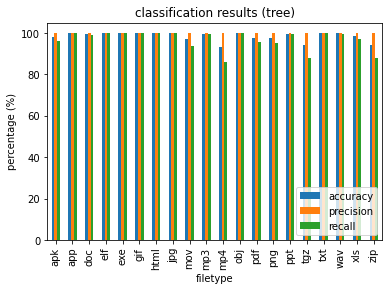

In [6]:
plot_results(run(Tree(), df), 'tree')

apk: accuracy = 99.60, precision = 100.00, recall = 99.20
app: accuracy = 100.00, precision = 100.00, recall = 100.00
doc: accuracy = 99.87, precision = 100.00, recall = 99.74
elf: accuracy = 100.00, precision = 100.00, recall = 100.00
exe: accuracy = 100.00, precision = 100.00, recall = 100.00
gif: accuracy = 99.99, precision = 100.00, recall = 99.98
html: accuracy = 100.00, precision = 100.00, recall = 100.00
jpg: accuracy = 99.91, precision = 100.00, recall = 99.82
mov: accuracy = 99.25, precision = 100.00, recall = 98.50
mp3: accuracy = 99.90, precision = 100.00, recall = 99.80
mp4: accuracy = 99.46, precision = 100.00, recall = 98.92
obj: accuracy = 100.00, precision = 100.00, recall = 100.00
pdf: accuracy = 99.71, precision = 100.00, recall = 99.43
png: accuracy = 98.61, precision = 100.00, recall = 97.22
ppt: accuracy = 99.87, precision = 100.00, recall = 99.74
tgz: accuracy = 97.61, precision = 100.00, recall = 95.22
txt: accuracy = 100.00, precision = 100.00, recall = 100.00
w

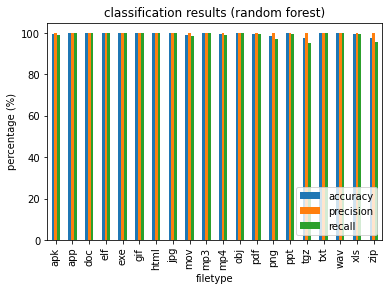

In [7]:
plot_results(run(RandomForestClassifier(), df), 'random forest')

apk: accuracy = 94.70, precision = 92.90, recall = 96.81
app: accuracy = 98.43, precision = 100.00, recall = 96.86
doc: accuracy = 99.74, precision = 99.66, recall = 99.83
elf: accuracy = 100.00, precision = 100.00, recall = 100.00
exe: accuracy = 97.82, precision = 100.00, recall = 95.65
gif: accuracy = 98.91, precision = 100.00, recall = 97.82
html: accuracy = 100.00, precision = 100.00, recall = 100.00
jpg: accuracy = 98.86, precision = 100.00, recall = 97.72
mov: accuracy = 90.16, precision = 87.91, recall = 93.11
mp3: accuracy = 100.00, precision = 100.00, recall = 100.00
mp4: accuracy = 75.74, precision = 71.48, recall = 85.66
obj: accuracy = 100.00, precision = 100.00, recall = 100.00
pdf: accuracy = 93.28, precision = 91.82, recall = 95.03
png: accuracy = 94.27, precision = 96.89, recall = 91.47
ppt: accuracy = 98.80, precision = 99.37, recall = 98.21
tgz: accuracy = 83.58, precision = 82.53, recall = 85.19
txt: accuracy = 97.59, precision = 100.00, recall = 95.18
wav: accuracy

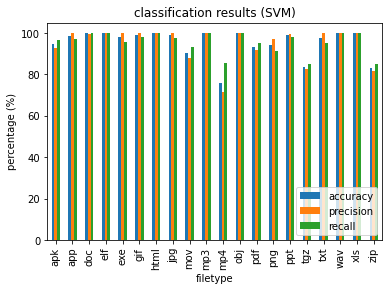

In [8]:
plot_results(run(SVC(gamma='auto'), df), 'SVM')

apk: accuracy = 67.46, precision = 60.60, recall = 99.78
app: accuracy = 98.97, precision = 99.15, recall = 98.79
doc: accuracy = 57.87, precision = 54.48, recall = 95.74
elf: accuracy = 98.21, precision = 100.00, recall = 96.43
exe: accuracy = 97.78, precision = 97.55, recall = 98.03
gif: accuracy = 93.87, precision = 89.40, recall = 99.54
html: accuracy = 90.00, precision = 100.00, recall = 80.00
jpg: accuracy = 55.48, precision = 52.99, recall = 96.92
mov: accuracy = 66.55, precision = 59.95, recall = 99.65
mp3: accuracy = 57.50, precision = 54.55, recall = 90.00
mp4: accuracy = 62.84, precision = 57.39, recall = 99.66
obj: accuracy = 88.24, precision = 88.24, recall = 88.24
pdf: accuracy = 73.63, precision = 65.63, recall = 99.20
png: accuracy = 54.75, precision = 52.52, recall = 99.01
ppt: accuracy = 61.73, precision = 56.66, recall = 99.74
tgz: accuracy = 54.23, precision = 52.22, recall = 99.49
txt: accuracy = 99.40, precision = 99.70, recall = 99.11
wav: accuracy = 70.30, preci

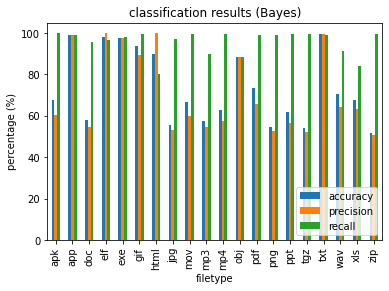

In [9]:
plot_results(run(GaussianNB(), df), 'Bayes')

apk: accuracy = 95.93, precision = 100.00, recall = 91.85
app: accuracy = 99.83, precision = 100.00, recall = 99.66
doc: accuracy = 99.36, precision = 100.00, recall = 98.72
elf: accuracy = 100.00, precision = 100.00, recall = 100.00
exe: accuracy = 99.88, precision = 100.00, recall = 99.75
gif: accuracy = 99.93, precision = 100.00, recall = 99.87
html: accuracy = 93.00, precision = 100.00, recall = 86.00
jpg: accuracy = 99.60, precision = 100.00, recall = 99.20
mov: accuracy = 92.21, precision = 100.00, recall = 84.43
mp3: accuracy = 100.00, precision = 100.00, recall = 100.00
mp4: accuracy = 82.52, precision = 100.00, recall = 65.03
obj: accuracy = 100.00, precision = 100.00, recall = 100.00
pdf: accuracy = 94.40, precision = 100.00, recall = 88.80
png: accuracy = 94.85, precision = 100.00, recall = 89.70
ppt: accuracy = 99.32, precision = 100.00, recall = 98.64
tgz: accuracy = 86.46, precision = 100.00, recall = 72.91
txt: accuracy = 99.79, precision = 100.00, recall = 99.58
wav: ac

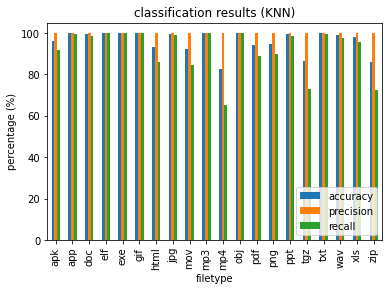

In [10]:
plot_results(run(KNeighborsClassifier(), df), 'KNN')

apk: accuracy = 88.86, precision = 87.77, recall = 90.32
app: accuracy = 98.12, precision = 96.98, recall = 99.32
doc: accuracy = 84.60, precision = 78.25, recall = 95.83
elf: accuracy = 96.07, precision = 95.74, recall = 96.43
exe: accuracy = 96.29, precision = 94.17, recall = 98.69
gif: accuracy = 98.18, precision = 97.13, recall = 99.28
html: accuracy = 72.00, precision = 76.19, recall = 64.00
jpg: accuracy = 78.46, precision = 79.86, recall = 76.12
mov: accuracy = 77.31, precision = 79.79, recall = 73.15
mp3: accuracy = 85.40, precision = 79.50, recall = 95.40
mp4: accuracy = 65.81, precision = 59.68, recall = 97.44
obj: accuracy = 72.35, precision = 72.09, recall = 72.94
pdf: accuracy = 69.91, precision = 84.02, recall = 49.18
png: accuracy = 82.44, precision = 82.90, recall = 81.75
ppt: accuracy = 94.36, precision = 91.34, recall = 98.02
tgz: accuracy = 68.26, precision = 70.56, recall = 62.67
txt: accuracy = 99.35, precision = 98.94, recall = 99.76
wav: accuracy = 87.52, precisi

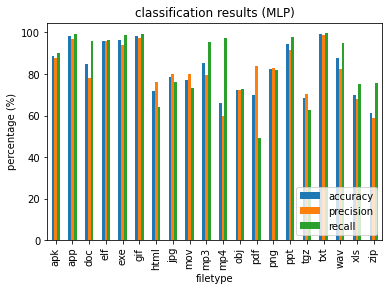

In [11]:
# copy the data
norm = df.copy()
  
# apply normalization techniques
for column in ['kurtosis','entropy','stdev','chi','autocorr','mean']:
    norm[column] = norm[column]  / norm[column].abs().max()
    
plot_results(run(MLPClassifier(), norm), 'MLP')

apk: accuracy = 88.79, precision = 92.44, recall = 84.48
app: accuracy = 99.46, precision = 99.64, recall = 99.28
doc: accuracy = 96.47, precision = 95.42, recall = 97.62
elf: accuracy = 100.00, precision = 100.00, recall = 100.00
exe: accuracy = 99.22, precision = 99.79, recall = 98.65
gif: accuracy = 98.89, precision = 98.18, recall = 99.63
html: accuracy = 100.00, precision = 100.00, recall = 100.00
jpg: accuracy = 96.31, precision = 97.18, recall = 95.38
mov: accuracy = 84.56, precision = 80.00, recall = 92.16
mp3: accuracy = 98.20, precision = 97.07, recall = 99.40
mp4: accuracy = 67.41, precision = 61.91, recall = 90.46
obj: accuracy = 100.00, precision = 100.00, recall = 100.00
pdf: accuracy = 89.35, precision = 85.96, recall = 94.06
png: accuracy = 87.29, precision = 94.87, recall = 78.85
ppt: accuracy = 91.92, precision = 98.81, recall = 84.86
tgz: accuracy = 73.12, precision = 73.18, recall = 73.00
txt: accuracy = 99.85, precision = 100.00, recall = 99.70
wav: accuracy = 97.7

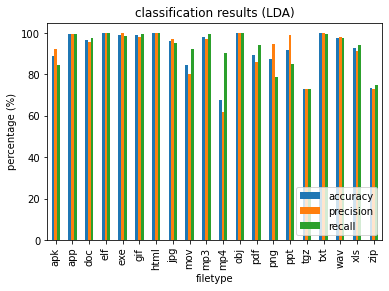

In [12]:
plot_results(run(LinearDiscriminantAnalysis(), df), 'LDA')

apk: accuracy = 90.23, precision = 83.81, recall = 99.73
app: accuracy = 88.43, precision = 81.21, recall = 100.00
doc: accuracy = 96.04, precision = 96.00, recall = 96.09
elf: accuracy = 50.00, precision = 0.00, recall = 0.00
exe: accuracy = 99.94, precision = 100.00, recall = 99.88
gif: accuracy = 99.66, precision = 99.73, recall = 99.60
html: accuracy = 50.00, precision = 0.00, recall = 0.00
jpg: accuracy = 98.34, precision = 99.06, recall = 97.60
mov: accuracy = 80.13, precision = 71.67, recall = 99.65
mp3: accuracy = 97.70, precision = 98.38, recall = 97.00
mp4: accuracy = 65.87, precision = 59.47, recall = 99.66
obj: accuracy = 50.00, precision = 0.00, recall = 0.00
pdf: accuracy = 88.88, precision = 82.25, recall = 99.16
png: accuracy = 70.32, precision = 62.89, recall = 99.15
ppt: accuracy = 96.98, precision = 94.56, recall = 99.70
tgz: accuracy = 63.64, precision = 57.95, recall = 99.41
txt: accuracy = 50.00, precision = 0.00, recall = 0.00
wav: accuracy = 98.51, precision = 9

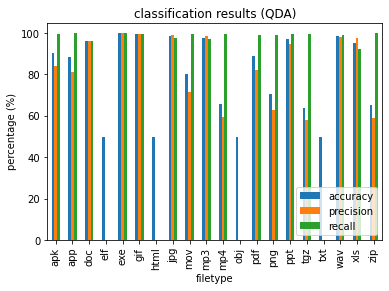

In [13]:
plot_results(run(QuadraticDiscriminantAnalysis(), df), 'QDA')

In [14]:
X = df.drop(['class', 'algorithm', 'filetype'], axis=1)
y = df['class']
skf = StratifiedKFold()
yp = cross_val_predict(RandomForestClassifier(), X, y, cv=skf)
acc = accuracy_score(y,yp)*100
pre = precision_score(y, yp)*100
rec = recall_score(y,yp)*100
print(acc, pre, rec)

99.45906379829715 100.0 98.9181406497591


apk 99.50989208633094 100.0 99.01978417266187
app 99.48130277442702 100.0 98.96260554885404
doc 99.31914893617021 100.0 98.63829787234043
elf 98.57142857142858 100.0 97.14285714285714
exe 99.5280114918941 100.0 99.05660377358491
gif 99.4429469901168 100.0 98.8858939802336
html 100.0 100.0 100.0
jpg 99.23076923076923 100.0 98.46153846153847
mov 99.41094941094941 100.0 98.82189882189883
mp3 99.6 100.0 99.2
mp4 99.50067476383266 100.0 99.00134952766531
obj 100.0 100.0 100.0
pdf 99.44223107569721 100.0 98.88446215139443
png 99.3452380952381 100.0 98.69047619047619
ppt 99.47244711412901 100.0 98.94489422825802
tgz 99.50537634408602 100.0 99.01075268817205
txt 99.55357142857143 100.0 99.10714285714286
wav 99.3069306930693 100.0 98.61386138613861
xls 98.42105263157895 100.0 96.84210526315789
zip 99.41492216854536 100.0 98.8298443370907


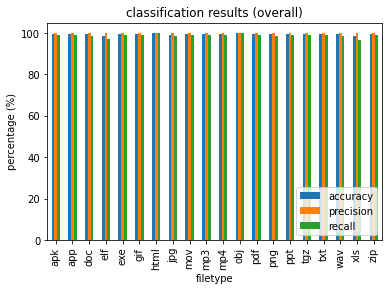

In [15]:
results = []
for filetype in np.unique(df['filetype']):
    cond1 = df['filetype'] == filetype
    acc = accuracy_score(y[cond1],yp[cond1])*100
    pre = precision_score(y[cond1],yp[cond1])*100
    rec = recall_score(y[cond1],yp[cond1])*100
    print(filetype, acc, pre, rec)
    results.append([filetype, acc, pre, rec])
    
results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
results.plot.bar(x='filetype')
plt.legend(loc='lower right')
plt.ylabel('percentage (%)')
plt.title('classification results (overall)');